In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree, write_volume
from cryofib.napari_utils import napari_add_group
from cryofib.data_loaders import load_F107_A1_pred, load_F107_A1_multicut

ModuleNotFoundError: No module named 'napari'

## View n5 datasets

In [2]:
data_dir = Path("/g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107")
em_n5_path = data_dir / "F107_A1_em.n5"

f_em = z5py.File(em_n5_path, "r")

In [3]:
print_key_tree(f_em)

Key structure of z5 file /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
raw
segmentation
segmentation/nuclei
segmentation/edoardo
segmentation/edoardo/boundaries
segmentation/edoardo/foreground
segmentation/ground_truth_channels
segmentation/ground_truth
raw_norm


## Read volumes

In [4]:
roi = np.s_[:]
em = read_volume(f_em, "raw", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume raw from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type uint8


## Open raw in napari

In [5]:
v = napari.Viewer()

In [6]:
ds = f_em["raw"]
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7f86442322c0>

In [ ]:
gt = read_volume(f_em, "segmentation/ground_truth", roi)

In [8]:
v.add_labels(gt, name="gt")

<Labels layer 'gt' at 0x7f08780fa0b0>

In [19]:
roi = np.s_[:]
nuclei = read_volume(f_em, "segmentation/nuclei", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/nuclei from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type uint8


In [20]:
v.add_labels(nuclei, name="nuclei")

<Labels layer 'nuclei' at 0x7f64400a2830>

In [22]:
write_volume("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_lifted_mc.n5", nuclei, "nuclei")

<class 'str'>
Created dataset nuclei
Writing array to nuclei


In [11]:
write_volume("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_lifted_mc.n5", em, "raw")

<class 'str'>
Overwriting raw
Writing array to raw


### Open all predictions in a group

In [7]:
f_pred = load_F107_A1_pred()

In [8]:
print_key_tree(f_pred)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
predictions
predictions/2D_s0_quantile_norm_min
predictions/2D_s0_quantile_norm_min/boundaries
predictions/2D_s0_quantile_norm_min/extra
predictions/2D_s0_quantile_norm_mean
predictions/2D_s0_quantile_norm_mean/boundaries
predictions/2D_s0_quantile_norm_mean/extra
predictions/full_masked_dice_s0_64x256x256_128x128x128
predictions/full_masked_dice_s0_64x256x256_128x128x128/fg
predictions/full_masked_dice_s0_64x256x256_128x128x128/extra
predictions/full_masked_dice_s0_64x256x256_128x128x128/bg
predictions/full_masked_dice_s0_64x256x256_128x128x128/boundaries
predictions/full_masked_dice_s0_64x256x256
predictions/full_masked_dice_s0_64x256x256/boundaries
predictions/full_masked_dice_s0_64x256x256/fg
predictions/full_masked_dice_s0_64x256x256/extra
predictions/full_masked_dice_s0_64x256x256/bg
predictions/2D_s0_quantile_norm_yzx
predictions/2D_s0_quantile_norm_yzx/fg
predictions/2D_s0_quantile_no

In [9]:
roi = np.s_[:]
boundaries = read_volume(f_pred, "predictions/2D_s0_quantile_norm_min/boundaries", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_min/boundaries from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


In [9]:
write_volume("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_lifted_mc.n5", boundaries, "boundaries")

<class 'str'>
Created dataset boundaries
Writing array to boundaries


In [10]:
v.add_image(boundaries, name="boundaries")

<Image layer 'boundaries' at 0x7fe66073c3a0>

In [3]:
roi = np.s_[:]
extra = read_volume(f_pred, "predictions/2D_s0_quantile_norm_mean/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_mean/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


In [10]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7fcdf0259960>

In [7]:
f_multicut = load_F107_A1_multicut()

In [8]:
print_key_tree(f_multicut)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
segmentation
segmentation/multicut_0.6_postprocessed_10000
segmentation/multicut_0.6_postprocessed
3D_s0_quantile_norm
3D_s0_quantile_norm/ws
3D_s0_quantile_norm/multicut_0.5
3D_s0_quantile_norm/multicut_0.6
3D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm_averaged
2D_s0_quantile_norm_averaged/multicut_0.3
2D_s0_quantile_norm_averaged/multicut_extra_0.3
2D_s0_quantile_norm_averaged/multicut_0.7
2D_s0_quantile_norm_averaged/multicut_0.5
2D_s0_quantile_norm_averaged/multicut_extra_0.7
2D_s0_quantile_norm_averaged/multicut_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.5
2D_s0_quantile_norm_averaged/multicut_0.6
2D_s0_quantile_norm_averaged/multicut_extra_0.6
2D_s0_quantile_norm_averaged/ws
2D_s0_quantile_norm
2D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm/ws
2D_s0_quantile_norm/multicut_0.5
2D_s0_quantile_norm/multicut_0.6


In [9]:
roi = np.s_[:]
multicut = read_volume(f_multicut, "2D_s0_quantile_norm_averaged/multicut_extra_0.6", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 2D_s0_quantile_norm_averaged/multicut_extra_0.6 from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint64


In [10]:
v.add_labels(multicut, name="multicut_extra")

<Labels layer 'multicut_extra' at 0x7f871a361d50>

(array([2.11824941e+09, 3.00866240e+07, 1.25640050e+07, 7.24105800e+06,
        4.83576400e+06, 3.55167100e+06, 2.79749900e+06, 2.30990800e+06,
        1.98188500e+06, 1.74079000e+06, 1.56026700e+06, 1.42499100e+06,
        1.31916400e+06, 1.23511500e+06, 1.16946700e+06, 1.11619600e+06,
        1.07065900e+06, 1.03974400e+06, 1.01549200e+06, 9.97172000e+05,
        9.86831000e+05, 9.84222000e+05, 9.85886000e+05, 9.97363000e+05,
        1.01856900e+06, 1.04955100e+06, 1.09489300e+06, 1.16169300e+06,
        1.25626900e+06, 1.40250300e+06, 1.64886400e+06, 2.16587600e+06,
        4.07590100e+06, 7.25463000e+06, 1.84807700e+06, 1.22092500e+06,
        1.00315800e+06, 8.83090000e+05, 8.05595000e+05, 7.51134000e+05,
        7.12088000e+05, 6.80368000e+05, 6.60077000e+05, 6.42395000e+05,
        6.29880000e+05, 6.19860000e+05, 6.15551000e+05, 6.11923000e+05,
        6.10328000e+05, 6.12328000e+05, 6.14399000e+05, 6.20958000e+05,
        6.30840000e+05, 6.43374000e+05, 6.59454000e+05, 6.803530

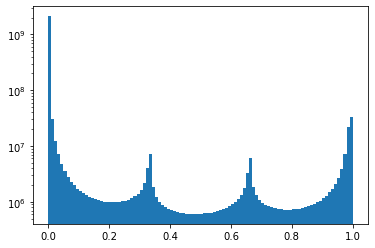

In [15]:
plt.hist(extra[extra > 0].flatten(), bins=100, log=True)

In [19]:
from skimage.filters import gaussian

In [23]:
extra_1 = (extra_blur > 0.3).astype(np.int16)

In [20]:
extra_blur = gaussian(extra, sigma=1.5)

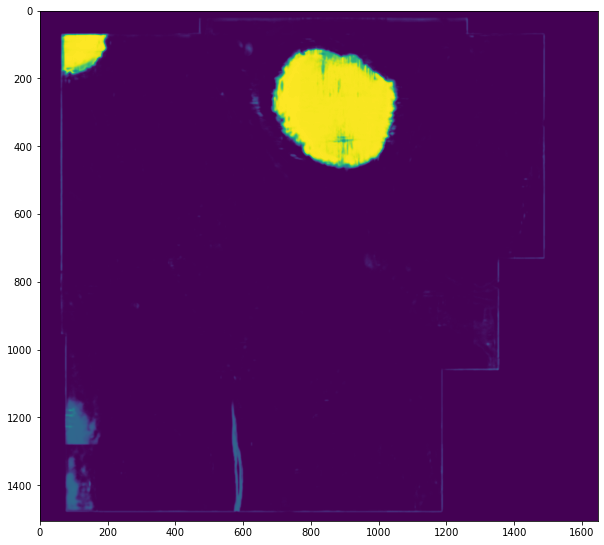

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(extra_blur[700, :, :])

In [9]:
extra_1.shape

(1350, 1506, 1647)

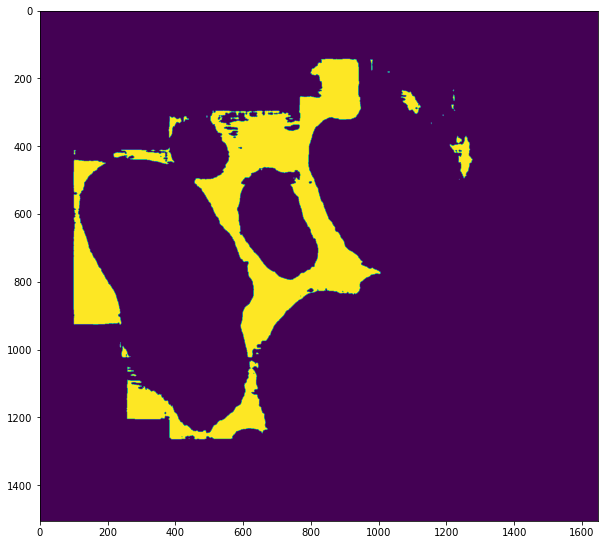

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(extra_1[1300, :, :])

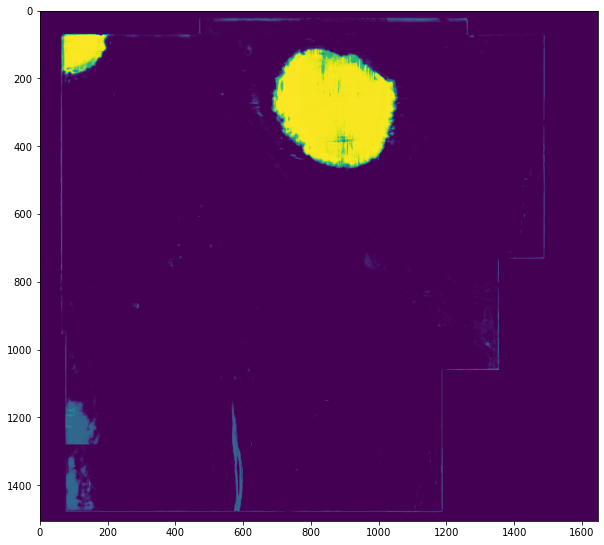

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(extra[700, :, :])

In [32]:
from skimage.morphology import binary_erosion, binary_closing

In [29]:
erosion_extra = binary_erosion(extra_1)

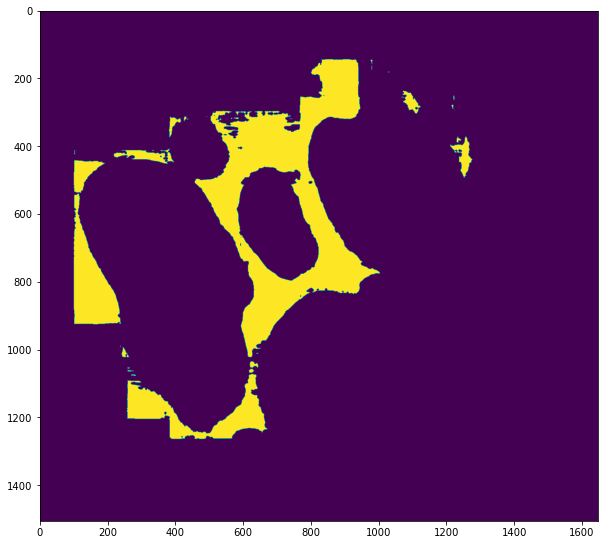

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(erosion_extra[1300, :, :])

In [33]:
closed_extra = binary_closing(extra_1)

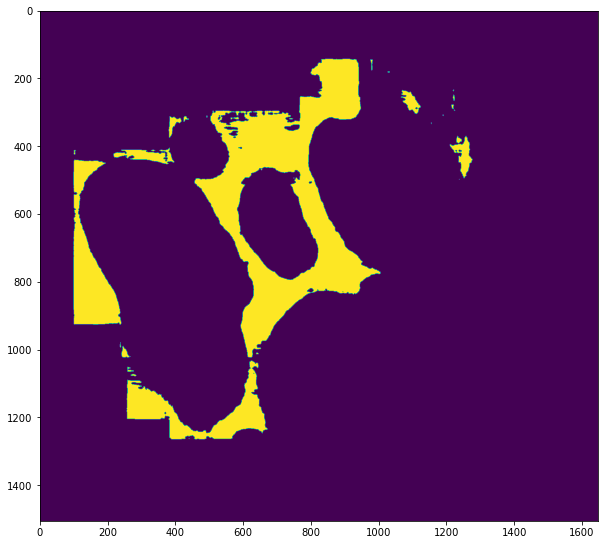

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(closed_extra[1300, :, :])

In [19]:
from skimage.measure import label
extra_segm = label(extra_1)
component_sizes = [np.count_nonzero(extra_segm == i) for i in np.unique(extra_segm)[1:]]

In [11]:
roi = np.s_[:]
extra_xzy = read_volume(f_pred, "predictions/2D_s0_quantile_norm_xzy/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_xzy/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


In [12]:
v.add_image(extra_xzy, name="extra_xzy")

<Image layer 'extra_xzy' at 0x7fc72c0748e0>

In [ ]:
extra_min = np.minimum(extra, extra_xyz)

(array([1.61656400e+06, 1.46465300e+06, 1.35923000e+06, 1.25479100e+06,
        1.15940100e+06, 1.06096300e+06, 9.77814000e+05, 9.00404000e+05,
        8.39098000e+05, 7.82722000e+05, 7.22721000e+05, 6.71288000e+05,
        6.33055000e+05, 5.96999000e+05, 5.59364000e+05, 5.28000000e+05,
        5.03691000e+05, 4.86783000e+05, 4.70087000e+05, 4.52412000e+05,
        4.40282000e+05, 4.25888000e+05, 4.16038000e+05, 4.03902000e+05,
        3.94384000e+05, 3.89219000e+05, 3.79107000e+05, 3.73549000e+05,
        3.65889000e+05, 3.62466000e+05, 3.60626000e+05, 3.51284000e+05,
        3.44411000e+05, 1.57703132e+08, 3.28165000e+05, 3.25301000e+05,
        3.20715000e+05, 3.17838000e+05, 3.13886000e+05, 3.09489000e+05,
        3.07232000e+05, 3.05650000e+05, 3.02489000e+05, 3.01843000e+05,
        3.01431000e+05, 2.98619000e+05, 2.97537000e+05, 2.97652000e+05,
        2.95828000e+05, 2.94617000e+05, 2.95111000e+05, 2.97996000e+05,
        2.94153000e+05, 2.92270000e+05, 2.91399000e+05, 2.942240

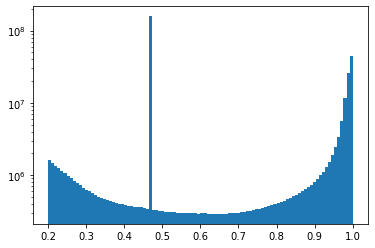

In [10]:
plt.hist(extra[extra > 0.2].flatten(), bins=100, log=True)

In [12]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7fec00304490>

In [10]:
bg = read_volume(f_pred, "predictions/2D_s0/bg", roi)
v.add_image(bg, name="bg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0/bg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


<Image layer 'bg' at 0x7f1de03a2c80>

In [14]:
fg = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/fg", roi)
v.add_image(fg, name="fg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/fg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


<Image layer 'fg' at 0x7fe6b0124250>